In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

In [2]:
# input
symbol = 'RELIANCE.NS'
start = '2012-12-01'
end = '2020-12-30'


df = web.get_data_yahoo(symbol, start, end)

In [3]:
print(df.head())

                  High         Low        Open       Close     Volume  \
Date                                                                    
2012-12-03  403.500000  394.875000  397.500000  402.000000  4718034.0   
2012-12-04  412.850006  403.000000  403.075012  412.350006  6985148.0   
2012-12-05  418.549988  410.299988  414.125000  416.299988  6179258.0   
2012-12-06  422.924988  411.000000  417.975006  421.950012  5273370.0   
2012-12-07  424.850006  415.225006  420.524994  417.299988  6029480.0   

             Adj Close  
Date                    
2012-12-03  377.021088  
2012-12-04  386.728027  
2012-12-05  390.432556  
2012-12-06  395.731506  
2012-12-07  391.370392  


In [4]:
X = df.iloc[ : , :-1].values
Y = df.iloc[ : , 3].values
X
Y

array([ 402.        ,  412.3500061 ,  416.29998779, ..., 2003.30004883,
       1990.05004883, 1995.5       ])

In [27]:
# add more technical featues

df["EMA20"] = df["Adj Close"].ewm(span=20, adjust = False).mean()

In [14]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000,1989.000000,1989.000000,1986.000000,1979.000000,1959.000000,1985.000000
mean,845.434884,825.258083,835.654741,834.854168,8.788019e+06,820.745791,20.176801,-14.908950,819.785073,818.510582,814.790515,13.042973
std,487.361926,473.946372,481.365388,480.206678,6.494896e+06,485.813670,19.721491,18.290156,484.482391,482.111029,475.015675,13.936982
min,388.975006,381.950012,383.500000,383.774994,0.000000e+00,359.928497,0.000000,-149.550049,363.297028,365.138400,371.873031,0.867917
25%,470.299988,458.149994,464.000000,463.875000,5.193356e+06,443.661224,8.450012,-23.836060,445.840378,447.368842,447.156745,5.116449
50%,545.174988,533.250000,540.000000,538.750000,6.922631e+06,521.850952,13.500000,-16.580811,522.836700,522.388705,517.820375,8.284471
75%,1186.000000,1145.000000,1167.000000,1166.250000,9.856750e+06,1156.836548,24.500000,-8.725098,1154.045583,1155.721381,1155.404818,15.488875
max,2369.350098,2310.550049,2325.000000,2324.550049,6.523004e+07,2324.550049,197.599976,130.899902,2315.316732,2288.195020,2238.136678,113.120965


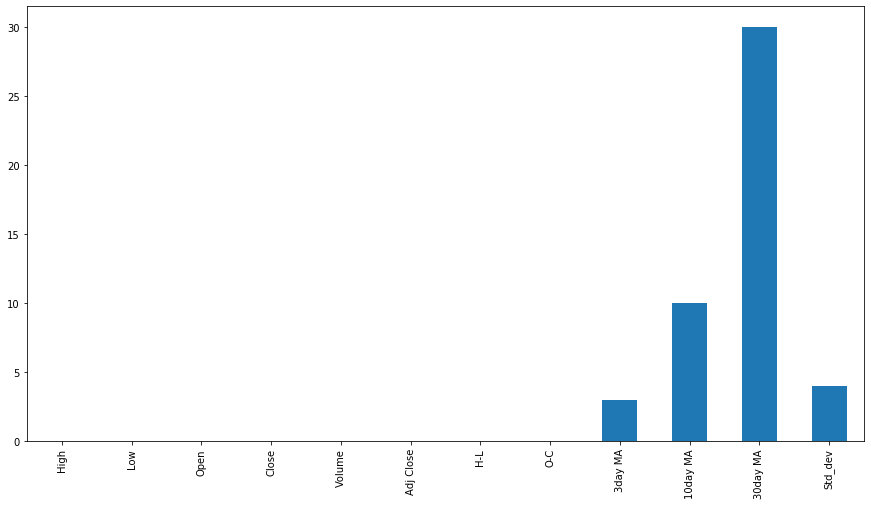

In [15]:
df_missing_count = df.isnull().sum() # Values of -1 is missing data
plt.rcParams['figure.figsize'] = (15,8)
df_missing_count.plot.bar()
plt.show()

In [16]:
for column in df:
    print("{0:15} {1:6d} {2:6}".format(column, df[column].nunique(), (df[column] == -1).sum()))

High              1782      0
Low               1789      0
Open              1680      0
Close             1880      0
Volume            1988      0
Adj Close         1934      0
H-L               1176      0
O-C               1985      2
3day MA           1981      0
10day MA          1977      0
30day MA          1957      0
Std_dev           1983      0


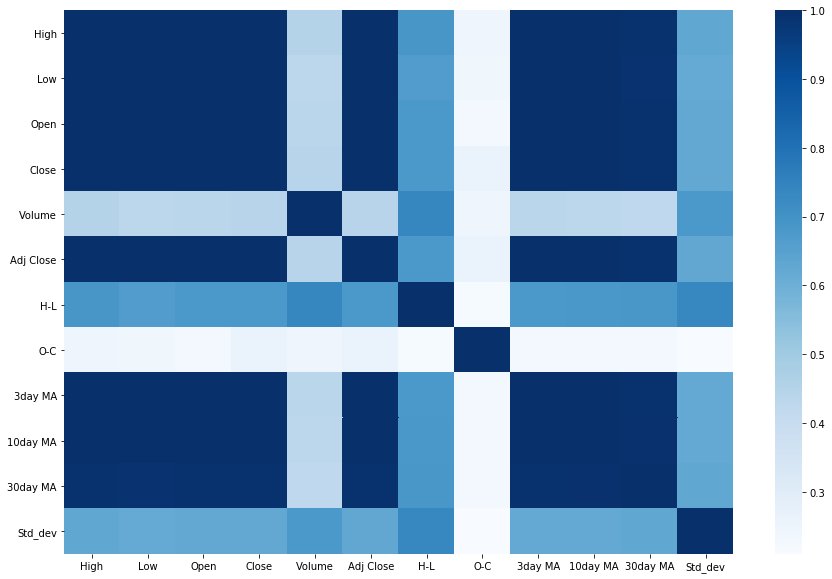

In [17]:
import seaborn as sns
#sns.set_style('White')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(15,10))
sns.heatmap(df[1:].corr(), cmap='Blues')
plt.show()

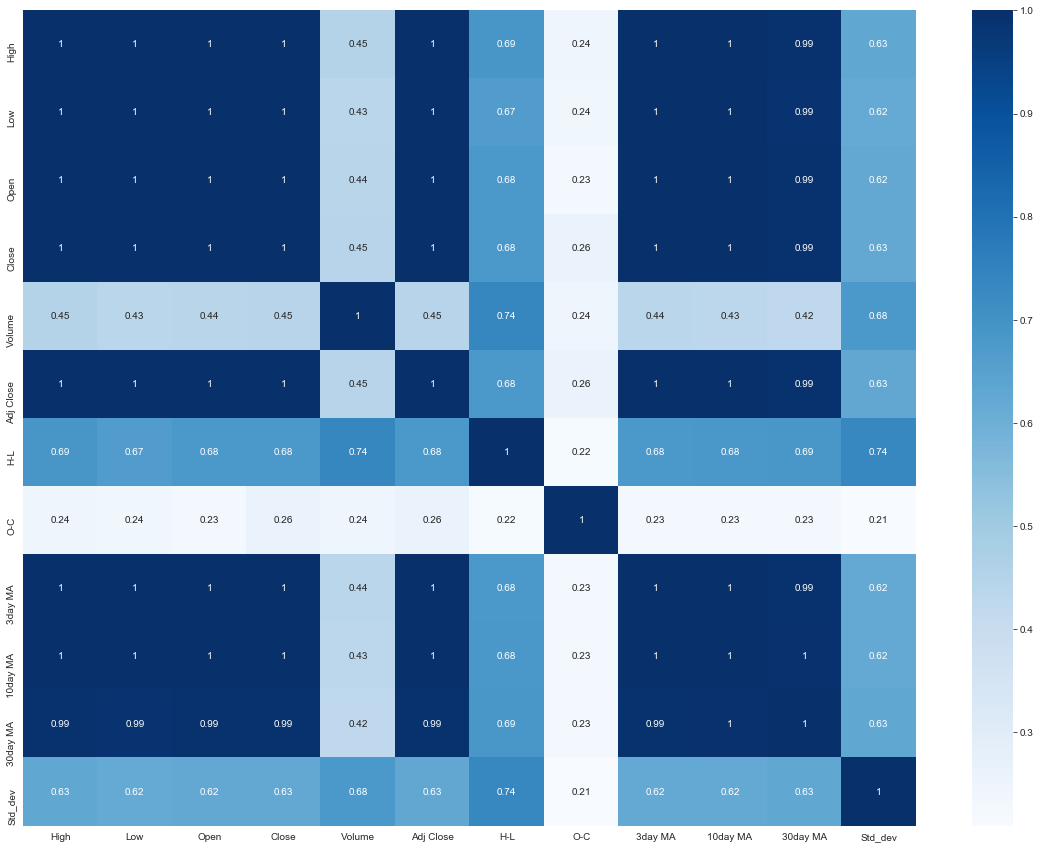

In [18]:
sns.set_style('white')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(20, 15))
sns.heatmap(df.iloc[:df.shape[0]].corr(), annot = True, cmap = 'Blues')
plt.show()

In [19]:
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

ImportError: cannot import name 'RandomizedLasso' from 'sklearn.linear_model' (C:\Users\tcgra\anaconda3\lib\site-packages\sklearn\linear_model\__init__.py)

In [20]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [21]:
X = df.drop(['Adj Close'], axis=1)
Y = df['Adj Close'].values

In [22]:
print(X.shape)
print(Y.shape)

(1989, 11)
(1989,)


In [23]:

X = np.array(X).reshape(1989,-1)
y = np.array(Y).reshape(1989,-1)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the features and transform
X_std = sc.fit_transform(X)

In [25]:

# Create a pca object with the 2 components as a parameter
pca = decomposition.PCA(n_components=2)

# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').